<a href="https://colab.research.google.com/github/kiryu-3/Prmn2023_DS/blob/main/Python/Python_DS/DS_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy

## Numpyとは
Numerical Python、略して**Numpy**は、 科学や数学のための数値計算ライブラリです。  
Pythonを使ってAIやデータサイエンスを学習する際には、不可欠なものになります。

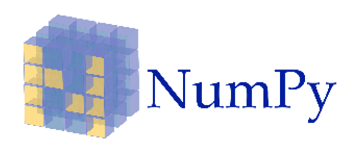

特に様々な数を**行列**の形にして計算することが多くなります。

GoogleColabやJupyter Labといった環境下では、最初から入っているため改めて入れる必要はありません。  
自分で入れる場合は`conda install numpy`や`pip install numpy`という記述をします。

  
  Numpyのような特殊なライブラリを扱う際には、**import**をすることで「Numpyを使うという宣言」をする必要があります。

In [ ]:
import numpy as np

`import`の先に、`import`したいライブラリの名前を書きます。  
この後に`as`を使うと、`np`という文字を使ってnumpyを扱うことができます。  
このような記述をするのが一般的です。

## NumPy Arrays
Numpyの行列のことを**Numpy Arrays**（**ndarray**ともいう）といいます。

`np.array()`という記述の中に、リストを入れることでndarrayを作ることができます。

行列やベクトルについて違いがよく分からない方は、[こちら](https://bit.ly/3drDGix)でイメージを掴んでいただけたらと思います。

In [ ]:
np.array([1,2,3])    # ベクトル生成

先ほどは1次元でしたが、リストを入れ子にすることで多次元のndarrayを作ることもできます。

In [ ]:
np.array([[1,2,3],[4,5,6],[7,8,9]])    # 行列生成

リストと同様に、インデックスを指定することで各要素を呼び出すことができます。

In [ ]:
list_example = [[1,2,3],[4,5,6]]
ndarray_example = np.array(list_example)

#  listの場合
print(list_example[1])
print(list_example[1][2])

#  ndarrayの場合
print(ndarray_example[1])    
print(ndarray_example[1,2])    # 2次元以上だと呼び出す形が少しだけ違う

ndarray内の要素のデータ型を確認してみましょう。

In [ ]:
type(list_example[1][2])

In [ ]:
type(ndarray_example[1,2])

ndarrayの1つ1つの要素は、**Numpyのデータ型**です。  
上の例から、1つ1つの要素はint型ではなく、numpy用のint型であることが分かると思います。

ndarrayを作るときに**`dtype`**という引数を指定すると、ndarrayのデータ型を指定することができます。

In [ ]:
# 一般的な画像データを扱うときに用いる。使用頻度高
ndarray = np.array([1,2,3] , dtype=np.uint8)    #  0～255までの値
ndarray

In [ ]:
# 細かい計算をする際、64bitだとデータが重くなるので、データを保存する際に用いる。
ndarray = np.array([1,2,3] , dtype=np.float32)    
ndarray

In [ ]:
# 実際に細かい計算をする際に用いる。
ndarray = np.array([1,2,3] , dtype=np.float64)    
ndarray

`astype()`で、元のndarrayのdtypeを変更することができます。

In [ ]:
ndarray.astype(np.int8)

ここまで学習した内容は、[こちら](https://bit.ly/3dmC0Hi)に図を用いた分かりやすい解説がありますので興味のある方は是非。

## Broadcast
ndarrayの演算について確認していきましょう。

In [ ]:
array1 = np.array([[1,2,3],[4,5,6]])
array2 = np.array([[1,2,3],[4,5,6]])

ndarrayの演算は各要素ごとに行われます。

In [ ]:
array1 + array2

In [ ]:
array1 + 2

リストで同様のことを行おうとすると、ただリストが結合されるだけで要素ごとの足し算は行われません。

In [ ]:
a = [[1,2,3],[4,5,6]]
b = [[1,2,3],[4,5,6]]
a + b

リストであってもfor文を使うと要素ごとの足し算はできますが、少し複雑になってしまいます。

In [ ]:
a = [1,2,3]
c = []
for n in a:
  c.append(n+2)
print(c)

ndarrayの要素数が異なる場合でも、演算が可能な場合があります。

In [ ]:
array1 = np.array([[1,2,3],[4,5,6]])
array2 = np.array([1,2,3])
array1 + array2

実際には以下のような計算が行われています。

In [ ]:
array1 = np.array([[1,2,3],[4,5,6]])
array3 = np.array([[1,2,3],[1,2,3]])
array1 + array3

要素数が一致しなかったり、行や列が足りなかったりしても自動で補完して演算が行われます。  
このNumpyの機能を**Broadcast**といいます。

以下のコードの例でも、Broadcastが働いています。



In [ ]:
array1 = np.array([[1,2,3],[4,5,6]])
array1 + 2
# array2をnp.array([[2,2,2],[2,2,2]])としたときの、array1+array2の計算と同じ意味

要素が中途半端だった場合はBroadcastは働きません。

In [ ]:
array1 = np.array([[1,2,3],[4,5,6]])
array2 = np.array([1,2,3,4])
array1 + array2

## shape
ndarrayのサイズを確認するには**`.shape`**と記述します。

In [ ]:
ndarray = np.array([[1,2,3],[4,5,6]])
ndarray.shape

タプルの形で**（縦,横）**の順にサイズが返されます。  
ndarrayを作ったら、基本的にはまずshapeを確認して、ndarrayの形が自分の予想通りであるか見るのがいいようです。

**`.reshape`**を使うことで、shapeを変更することができます。  
(`reshape`については[こちら](https://bit.ly/3QWHhD0)が参考になると思います)

In [ ]:
ndarray.reshape(3,2)

要素の数は元のndarrayのサイズに合わないとエラーが発生します。

In [ ]:
ndarray.reshape(3,1)    # 3×2=6のndarrayに対して3×1=3はダメ

**ベクトルを複数の行・列にまとめたものが行列です**。  


In [ ]:
# ベクトル
ndarray1 = np.array([1,2,3]) 
ndarray1.shape

In [ ]:
# 1行3列の行列
# リストがもう1個別のリストに入って格納されている
ndarray2 = np.array([[1,2,3]])
ndarray2.shape  

次元の数のことを**ランク**と呼びます。  

今回は`ndarray1`はランク1、`ndarray2`はランク2ではあるが1行であるケースとなります。  
見た目は全く同じですが、ランクが異なるので、shapeしたときの結果が微妙に変化します。

### ランクの増減
先ほどの`ndarray1`も`ndarray2`も同じ意味ですが、(1,3)のndarrayであれば(3,)にランクを削減することが多いです。

このように、ランクを増加させたり削減させたりする関数について以下に述べていきます。

#### np.expand_dims(ndarray,axis)
ランクを1つ追加することができます。  
`axis=0`と指定した場合は1つ目の次元を、`axis=-1`と指定したときは最後の次元を追加します。

In [ ]:
ndarray = np.array([1,2,3])
ndarray

In [ ]:
ndarray.shape    # ベクトル

In [ ]:
expand_ndarray1 = np.expand_dims(ndarray,axis=0)
expand_ndarray1

In [ ]:
expand_ndarray1.shape    # 1行3列の行列

In [ ]:
expand_ndarray2 = np.expand_dims(ndarray,axis=-1)
expand_ndarray2

In [ ]:
expand_ndarray2.shape    # 3行1列の行列

#### np.squeeze(ndarray)
1の次元を無くすことができます。
例えば(3,3,1)のshapeを(3,3)のshapeにします。

In [ ]:
squeeze_ndarray = np.squeeze(expand_ndarray1)    # 元は1行3列の行列
squeeze_ndarray    # 1の次元がなくなり、ベクトルの形に戻る
print(expand_ndarray1.shape)
print(squeeze_ndarray.shape)

In [ ]:
squeeze_ndarray = np.squeeze(expand_ndarray2)    # 元は3行1列の行列
squeeze_ndarray    # 1の次元がなくなり、ベクトルの形に戻る
print(expand_ndarray2.shape)
print(squeeze_ndarray.shape)

#### .flatten()
ndarrayを一発で1次元にする（ベクトルにする）こともできます。  
行列構造を持つ必要がなくなった場合などに使います。

In [ ]:
ndarray = np.array([[1,2,3],[4,5,6],[7,8,9]])
ndarray.shape

In [ ]:
ndarray.flatten()

## スライス
リストの時と同様、**[N:M]**としたとき、インデックスが「**N以上M未満**」の要素を得ることができます。

Nを省略した場合：最初の要素以上  
Mを省略した場合：最後の要素未満

In [ ]:
ndarray = np.array([1,2,3,4])
ndarray

In [ ]:
ndarray[1:3]    #インデックス1以上3未満

In [ ]:
ndarray[:3]    #インデックス3未満

In [ ]:
ndarray[1:]    #インデックス1以上

インデックスがマイナスの場合は少し複雑です。
マイナスの値を入れた場合、後ろから値を得ます。

In [ ]:
ndarray[-2]

In [ ]:
ndarray[-2:]    #インデックス-2以上

In [ ]:
ndarray[:-2]    #インデックス-2未満

コロンだけだった場合、全ての値を得ることができます。

In [ ]:
ndarray[:]

1次元の場合はリストと同じなので特に難しくないと思いますが、多次元であるとややこしくなります。

In [ ]:
ndarray = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
ndarray

In [ ]:
ndarray[:3]

スライスの順番もインデックスと同様、最初が行になります。
カンマで区切ります。

In [ ]:
ndarray[:3,1:]

In [ ]:
ndarray[:,1:]    #よく使う書き方

## Numpyの行列生成
Numpyには様々なndarrayを作る関数が用意されています。以下に紹介します。

### np.arange([start,] stop [,step])
**start以上stop未満の値をstepずつ増加させた値のarray**です。  
※[]は省略可能を意味します。

startとstepは省略可能で、それぞれ0と1がデフォルトで入ります。

In [ ]:
np.arange(10)

In [ ]:
np.arange(10,1,-1)

パラメーターを機械的に作ってリストを作成したい場合など、様々な場面でよく使われます。  
[こちら](https://bit.ly/3qP27cQ)に図による紹介があるので良ければ参考にしてください。

### np.linspace(start,stop,num=50)
**start以上stop以下の数をnum個で区切った値のarray**です。  
stopを含むので注意が必要です。



In [ ]:
np.linspace(0,10,5)

`endpoint=False`という引数で、stopの数字以下ではなく**未満**で結果を出力することができます。

In [ ]:
np.linspace(0,10,5,endpoint=False)

ステップが分かっていないが、取り出したい数が分かっている場合に、よく使われます。  
[こちら](https://bit.ly/3Uq8lxc)に図による紹介があるので良ければ参考にしてください。

### np.logspace(start,stop,num=50)
(10^start)以上(10^stop)以下の数をnum個で区切った値のarrayです。
同じくstopを含みます。

In [ ]:
np.logspace(0,3,10)
# 10の(0/3)乗、10の(1/3)乗、10の(2/3)乗、…、10(9/3乗)

In [ ]:
np.linspace(0,3,10)    # ここで出た数をlogspaceの指数としている

同じく`endpoint=False`という引数で、stopの数字以下ではなく**未満**で結果を出力することができます。

In [ ]:
np.logspace(0,3,10,endpoint=False)

In [ ]:
np.linspace(0,3,10,endpoint=False)    # ここで出た数をlogspaceの指数としている

### np.zeros(shape)
要素が全て0のndarray（**零行列**）を作成することができます。

In [ ]:
shape = (4,5)    # numpyのshapeはタプルで操作
np.zeros(shape)

タプルではなく整数値を入れると、その数だけの1列の零行列が作成されます。

In [ ]:
np.zeros(5)

最初の処理で一旦ndarrayを作っておきたい時などによく使われます。

### np.ones(shape)
要素が全て1のndarrayを作成することができます。

In [ ]:
shape = (4,5)
np.ones(shape)

In [ ]:
np.ones(5)

デフォルトの値を設定したいときは**`ones`**、したくないときは**`zeros`**というように使い分けるようです。  
[こちら](https://bit.ly/3QQssBW)ではさらに詳しい解説がありますので、良ければ参考にしてください。

### np.eye(N)
N×Nの単位行列を作ります。  
※単位行列：体格成分が全て1となる正方行列

In [ ]:
np.eye(5)

行列指定をすることで、正方行列以外も作成することができます。

In [ ]:
np.eye(4,5)

### np.random.rand()
引数を何も指定しない場合は、0～1の中で単純な乱数が生成されます。

In [ ]:
np.random.rand()

引数を入れるとndarrayを返します。

In [ ]:
np.random.rand(4,5)

**`seed`**を指定することで、同じ`seed`が指定してあれば毎回同じ乱数を生成することができます。  
乱数生成には基本的に`seed`を作るようにしましょう。他の人と同じ結果を共有することができます。

In [ ]:
np.random.seed(1)
np.random.rand()

### np.random.randn()
**標準正規分布**（平均0、分散1）からランダムの値を返します。  
（標準正規分布については[こちら](https://bit.ly/3Sjct0c)などを参照してください）

In [ ]:
np.random.randn()

In [ ]:
np.random.randn(3,2)    # 0付近の値が出てくる確率が高い

### np.random.randint(low [,high] [,size])
`low`以上`high`未満のランダムな整数で、`size`のndarrayを生成します。

In [ ]:
np.random.randint(0,10,(4,5))

`low`だけ指定した場合は、0以上`low`未満の値が生成されます。

In [ ]:
np.random.randint(10)

### np.random.choice()
指定したndarray(リスト)から、ランダムな値を取得します。

In [ ]:
a = [0,1,2,3]
np.random.choice(a)    # 0～3の整数の中からランダムに値を取得

[こちら](https://bit.ly/3BTGPkD)ではさらに詳しい解説がありますので、良ければ参考にしてください。

## 統計量
データの特徴を要約した値を**統計量**といいます。  
標準正規分布から乱数をつくり、そのndarrayに対して統計量を求めていきます。

In [ ]:
np.random.seed(1)
ndarray = np.random.randn(4,4)
ndarray

### .max()と.argmax()
`.max()`で最大値を取得することができます。

In [ ]:
ndarray.max()

`argmax()`で最大値のインデックスを取得することができます。

In [ ]:
ndarray.argmax()

インデックスを用いて値を取得する場合は、**`.flatten()`**を用いる必要があります。

In [ ]:
ndarray.flatten()[ndarray.argmax()]

### .min()と.argmin()
最大値と同様、`.min()`で最小値を、`argmin()`で最小値のインデックスを取得することができます。

In [ ]:
ndarray.min()

In [ ]:
ndarray.argmin()

In [ ]:
ndarray.flatten()[ndarray.argmin()]

### .mean()
平均値を取得することができます。

In [ ]:
ndarray.mean()

### np.median(ndarray)
中央値を取得することができます。  
`max`や`mean`らと少し形が異なることに注意しましょう。

In [ ]:
np.median(ndarray)

中央値には計算に時間がかかるが、外れ値に強いという特徴があります。  

実際に時間を計測してみましょう。

In [ ]:
import time    # モジュールのimport
big = np.random.randint(10,100,(1000,10000))
before = time.time()    # 現時間の時間を出力

np.median(big)
after_median = time.time()
print("中央値を求めるのにかかった時間は{}秒です" .format(after_median - before))

np.mean(big)
after_mean = time.time()
print("平均値を求めるのにかかった時間は{}秒です".format(after_mean - after_median))

### .std()
標準偏差を取得することができます。  
※標準偏差：データの分散を示す指標

In [ ]:
ndarray.std()

### 行・列ごとの統計量
特定の行、列での統計量を求めたい場合は、**引数axis**を指定します。  

axis=0:各列の統計量  
axis=1:各行の統計量

In [ ]:
print(f"axis=0:{ndarray.max(axis=0)}")
print(f"axis=1:{ndarray.max(axis=1)}")

## 数学で使う便利な関数
Numpyに組み込まれている以下の関数をよく使います。

### np.sqrt()
平方根を求めることができます。

In [ ]:
x = np.linspace(1,5,5)    #array([1., 2., 3., 4., 5.])
np.sqrt(x)

### np.log()
底がネイピア数eであるlogを求めることができます。  
`np.log10()`や`np.log2()`のようにすると、10や2を底にすることができます。

In [ ]:
print(f"底e : {np.log(x)}")
print(f"底10 : {np.log10(x)}")
print(f"底2 : {np.log2(x)}")

### np.exp()
底がeである指数関数を求めることができます。

In [ ]:
np.exp(x)

### np.e
ネイピア数を求めることができます。

In [ ]:
print(np.e)
print(np.log(np.e))

### np.sum()
合計を求めることができます。

In [ ]:
array = np.arange(1,7)    #array([1., 2., 3., 4., 5., 6.])
np.sum(array)

ここでも**引数axis**を指定することで、行毎・列毎に計算することができます。

In [ ]:
ndarray = array.reshape(2,3)
"""
array([[1, 2, 3],
       [4, 5, 6]])
"""
print(np.sum(ndarray,axis=0))
print(np.sum(ndarray,axis=1))

### np.abs()
絶対値を求めることができます。

In [ ]:
array = np.arange(-1,-6,-1)    # array([-1, -2, -3, -4, -5])
np.abs(array)

## NaN
0で割った時や、logの真数に0以下の数を入れた場合は、**NaN**という値が返されます。  
NaN:Not a Number

In [ ]:
np.log(-10)

**`np.nan`**とすることで、明示的にNaNを発生させることができます。

In [ ]:
np.nan

NaNはfloat型であるので、**float関連のエラーが出てきたらNaNを疑うようにしましょう**。  

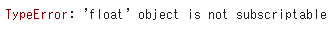

In [ ]:
type(np.nan)

**PythonのNoneとは別物**であり、また比較演算子を使ってNaNであるかのチェックをすることができません。

In [ ]:
print(np.log(-100) == np.nan)    # Trueが望ましいが、Falseが出力される
print(np.log(-100) is np.nan)    # Trueが望ましいが、Falseが出力される

**`np.isnan()`**という関数を利用することで、NaNをチェックすることができます。

In [ ]:
np.isnan(np.log(-100))

## Ndarrayの条件フィルター
ndarrayの要素を変更する関数について以下に述べます。

### np.clip(a , a_min , a_max)
最小値と最大値を設定します。  
それらの範囲以外の数字は最小値、もしくは最大値を適用します。

In [ ]:
array = np.arange(1,11)    # array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
np.clip(array,3,7)    # 3以下の自然数は3、7以上の自然数は7

### np.where(condition , a , b)
condition(条件)がTrueの要素はaに、Falseの要素はbに置き換わります。

In [ ]:
array = np.linspace(1,10,10)    # array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
np.where(array > 3 , 1 , 0)

conditionのみ指定すると、その条件に一致するインデックスを取得することができます。  
※あまり使いません

In [ ]:
np.where(array > 3)

ndarrayにフィルターをかけるときは、`where`より
**`ndarray[condition]`**という形の方が一般的です。

In [ ]:
array[array > 3]

多次元だった場合は、フラットな状態で返ってきます。

In [ ]:
array = np.linspace(1,10,10)
ndarray = array.reshape(2,5)
"""
array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.]])
"""
ndarray[ndarray > 3]

**`(condition).all()`**とすると、ndarrayのすべての要素がconditionを満たすかどうかを判定することができます。

In [ ]:
array1 = np.linspace(1,10,10)
array2 = np.linspace(4,10,10)

print((array1 > 3).all())    # 3以下の数字もあるのでFalse
print((array2 > 3).all())    # 3以下の数字はないのでTrue

**`(condition).any`**とすると、ndarrayの要素のどれか1つがconditionを満たすかどうかを判定することができます。

In [ ]:
array1 = np.linspace(1,10,10)
array2 = np.linspace(4,10,10)

print((array1 > 3).any())    # 3以上の数字はあるのでTrue
print((array2 > 3).any())    # 3以上の数字しかないのでTrue

`.all()`と`.any()`は**axis**を引数に持つことが可能であるため、  
行列それぞれ毎に評価を行うことができます。

In [ ]:
array = np.linspace(1,10,10)
ndarray = array.reshape(2,5)

print((ndarray > 3).all(axis=1))    #行毎に評価
print((ndarray > 3).any(axis=1))   #行毎に評価

### np.unique()
重複の要素を除いた結果を出力します。

In [ ]:
array = np.array([0,1,1,2,2,2,3,3,3,3])
np.unique(array)

引数として**`return_counts=True`**とすると、各要素のカウントを返します。

In [ ]:
np.unique(array,return_counts=True)

### np.bincount()
0,1,2,3…の各カウント数を返します。

In [ ]:
array = np.array([1,1,1,2,2,2,3,3,3,3])
np.bincount(array)

**ndarray内にはない要素の数についても得ることができます**。

## 結合と転置
2つのndarrayをくっつけたり、重ねたりすることが以下に紹介する関数で可能となります。

In [ ]:
ndarray_even = np.arange(0,18,2).reshape(3,3)
"""
array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])
"""
ndarray_odd = np.arange(1,18,2).reshape(3,3)
"""
array([[ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17]])
"""

### np.concatenate()
arrayを結合することができます。

In [ ]:
np.concatenate([ndarray_even,ndarray_odd])

`concatenate`は**axis**を指定することによって特定の軸で連結することが可能です。  
デフォルトでは縦(0)ですが、`axis=1`とすると横に結合します。

In [ ]:
np.concatenate([ndarray_even,ndarray_odd] , axis=1)

使用頻度としては、次に紹介する関数の方がより使います。

### np.stack()
新たなaxis（次元）を作成し、データを連結します。  
配列を連結する`concatenate`とは異なり、配列を重ねるイメージです。

In [ ]:
array1 = np.arange(0,6).reshape(2,3)
array2 = np.arange(6,12).reshape(2,3)

In [ ]:
np.stack([array1,array2])    # デフォルトはaxis=0、奥行き方向

In [ ]:
np.stack([array1,array2],axis=1)    # 縦方向

In [ ]:
np.stack([array1,array2],axis=2)    # 横方向

イメージがよく湧かない方は、以下の画像などを参考にしてみて下さい。

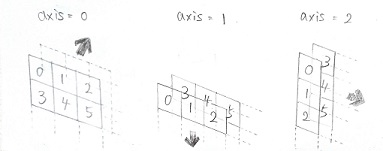

**`axis=-1`**と指定する場合（一番最後の次元を追加）が非常に多いです。

In [ ]:
np.stack([array1,array2],axis=-1)    # 今回の場合はaxis=2と同じ意味

### np.transpose or .T
行と列を全て入れ替えることができます。

In [ ]:
np.random.seed(1)
ndarray = np.random.randn(3,4)
ndarray

In [ ]:
np.transpose(ndarray)

In [ ]:
ndarray.T

## ndarrayの保存とロード
作ったndarrayを保存したり読み込んだりすることは、特に画像データを加工する際などによく行われます。
結構簡単です。

In [ ]:
np.random.seed(1)
ndarray = np.random.randn(3,4)
ndarray

### np.save('ファイルパス',ndarray)
第一引数にファイル名（パス）、第二引数でndarrayを指定します。

In [ ]:
np.save('sample1',ndarray)

ページの左に表示されるファイル構造に注目してください。  
**`npy`**ファイルが作成されました。

### np.load('ファイルパス')
保存したndarrayを読み込むことができます。  
拡張子**`.npy`**を付ける必要があります。

In [ ]:
np.load('sample1.npy')